# 鳶尾花(Iris)品種的辨識

## 載入相關套件

In [3]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.utils import Bunch

## 載入資料集

In [4]:
ds:Bunch =  datasets.load_iris()
#print(type(ds))
print(ds.data)
print(ds.feature_names)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [5]:
import pandas as pd
df = pd.DataFrame(ds.data, columns=ds.feature_names)
print(df)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


In [6]:
y = ds.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
ds.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [9]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [10]:
df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

# 資料分割

In [25]:
# 指定X，並轉為 Numpy 陣列
X = df.values

# 資料分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

# 查看陣列維度
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [26]:
y_train

array([1, 1, 0, 2, 2, 0, 0, 0, 0, 1, 2, 1, 0, 0, 0, 0, 2, 0, 1, 0, 1, 0,
       2, 1, 2, 0, 1, 2, 1, 1, 2, 2, 0, 1, 2, 1, 1, 1, 2, 0, 2, 1, 0, 1,
       1, 2, 1, 2, 0, 0, 0, 2, 1, 1, 2, 1, 1, 1, 2, 1, 0, 1, 0, 2, 2, 0,
       1, 0, 1, 2, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 1, 2, 1, 0, 0,
       0, 2, 1, 0, 0, 2, 2, 1, 1, 2, 0, 2, 2, 2, 1, 0, 2, 2, 1, 2, 2, 1,
       1, 0, 0, 2, 1, 0, 2, 1, 1, 2])

## 特徵縮放

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

## 選擇演算法

In [28]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [29]:
clf.fit(X_train_std, y_train)

LogisticRegression()

In [30]:
y_pred = clf.predict(X_test_std)
y_pred

array([1, 0, 1, 2, 0, 2, 2, 0, 0, 0, 0, 2, 1, 2, 2, 1, 1, 0, 1, 0, 2, 2,
       2, 0, 2, 2, 1, 0, 1, 1])

In [31]:
y_test

array([1, 0, 1, 2, 0, 2, 2, 0, 0, 0, 0, 2, 1, 2, 2, 1, 1, 0, 1, 0, 2, 2,
       2, 0, 2, 2, 2, 0, 1, 1])

In [32]:
print(f'{accuracy_score(y_test, y_pred)*100:.2f}%')

96.67%


## 群集

In [33]:
from sklearn import datasets

In [34]:
X = datasets.load_iris()
X = X.data

In [35]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, init='k-means++', n_init='auto')

In [36]:
model.fit(X)

KMeans(n_clusters=3)

In [37]:
y_pred = model.predict(X)

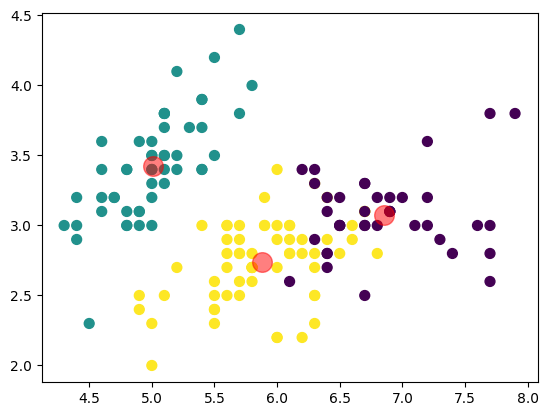

In [38]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y_pred, s=50, cmap='viridis')
centers = model.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

##  Importing Numpy

In [39]:
import numpy as np

NumPy陣列是我們在課程中將使用NumPy的主要方式。NumPy陣列基本上有兩種類型：向量和矩陣。向量是嚴格的一維（1D）陣列，而矩陣是二維的（但你應該注意，矩陣仍然可以只有一行或一列）。
## 為什麼使用Numpy陣列？為什麼不只是使用列表？
使用Numpy陣列而不是“標準”Python列表對我們來說有很多原因。我們的主要原因包括：
- Numpy陣列的內存效率比列表高
- 能夠輕鬆擴展到N維對象
- Numpy陣列的計算速度快
- 使用Numpy進行廣播操作和函數
- 我們使用的所有數據科學和機器學習庫都是使用Numpy構建的

## Numpy陣列可以做什麼的簡單示例
這是使用Numpy陣列的一個簡單示例，它可以做到什麼程度。

In [40]:
import numpy as np
my_list = [1,2,3]
my_array = np.array(my_list)
print(my_list)
print(type(my_array))

[1, 2, 3]
<class 'numpy.ndarray'>


In [41]:
my_list = [1,2,3]
my_array = np.array(my_list,dtype="int8")
print(my_array.dtype)

int8


### arange
在給定的間隔內返回均勻間隔的值。[[參考資料]](<https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.arange.html> "參考資料")

In [42]:
import numpy as np
np.arange(0,10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [43]:
np.arange(0,10,2)

array([0, 2, 4, 6, 8])

In [44]:
np.zeros(3)

array([0., 0., 0.])

In [45]:
np.ones(3)

array([1., 1., 1.])

In [46]:
np.ones((3,3))

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

### linspace

In [47]:
np.linspace(0,10,50)

array([ 0.        ,  0.20408163,  0.40816327,  0.6122449 ,  0.81632653,
        1.02040816,  1.2244898 ,  1.42857143,  1.63265306,  1.83673469,
        2.04081633,  2.24489796,  2.44897959,  2.65306122,  2.85714286,
        3.06122449,  3.26530612,  3.46938776,  3.67346939,  3.87755102,
        4.08163265,  4.28571429,  4.48979592,  4.69387755,  4.89795918,
        5.10204082,  5.30612245,  5.51020408,  5.71428571,  5.91836735,
        6.12244898,  6.32653061,  6.53061224,  6.73469388,  6.93877551,
        7.14285714,  7.34693878,  7.55102041,  7.75510204,  7.95918367,
        8.16326531,  8.36734694,  8.57142857,  8.7755102 ,  8.97959184,
        9.18367347,  9.3877551 ,  9.59183673,  9.79591837, 10.        ])

### Random
NumPy也有許多方法來創建隨機數陣列：

In [48]:
np.random.rand(2)

array([0.6115127 , 0.16971062])

In [49]:
np.random.rand(5,2)

array([[0.58911302, 0.4189207 ],
       [0.39094251, 0.46303794],
       [0.02780231, 0.95501637],
       [0.51246353, 0.78459367],
       [0.98601148, 0.12338098]])

In [50]:
v1 = np.random.rand(500)
#print(v1)
m = v1.mean()
std = v1.std()
m,std

(np.float64(0.4693855063856314), np.float64(0.2827490294083295))

### randn
從“標準正態”分佈[σ = 1]返回樣本（或樣本）。與 rand 不同，靠近零的值更有可能出現。[[參考資料]](<https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.randn.html> "參考資料")

標準正態分佈是一種特殊的常態分佈，其平均數（μ）為0，標準差（σ）為1。在標準正態分佈中，數據點主要集中在平均值附近，並且隨著距離平均值的增加而呈指數下降。這種分佈的曲線形狀呈鐘形，並且在平均值附近有一個尖峰。

在機器學習和統計學中，標準正態分佈通常用於建模和分析，並且在許多算法和技術中被廣泛應用。

In [51]:
v2 = np.random.randn(50000)
m2 = v2.mean()
std2 = v2.std()
m2,std2

(np.float64(0.0017662760637999072), np.float64(1.003216933848086))

In [52]:
np.random.randint(1,100,10)

array([45,  8, 37, 44, 25,  8, 97, 25, 84, 32])

In [53]:
np.random.choice(range(1,100),10)

array([36, 62, 42, 99, 11, 61, 43,  5, 69, 38])

### seed
可以用來設置隨機狀態，以便可以重現相同的“隨機”結果。[[參考資料]](<https://numpy.org/doc/stable/reference/random/generated/numpy.random.seed.html> "參考資料")

In [54]:
np.random.seed(100)
np.random.randn(4)

array([-1.74976547,  0.3426804 ,  1.1530358 , -0.25243604])

In [55]:
v2 = np.random.randn(50000)*5+170
m2 = v2.mean()
std2 = v2.std()
m2,std2

(np.float64(170.0091777095196), np.float64(4.997214066829281))

### Reshape
返回一個包含相同數據但具有新形狀的陣列。[[參考資料]](<https://numpy.org/doc/stable/reference/generated/numpy.reshape.html> "參考資料")

In [56]:
arr = np.arange(25)
raArray = np.random.randint(0,50,10)
arr,raArray

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 array([28, 41, 12, 30, 49,  6, 39, 10, 10, 36]))

In [57]:
arr5x5 = arr.reshape(5,5)
print(arr)
print(arr5x5)
arr5x5[0,2] = 77
print("==========================")#共享資料
print(arr)
print(arr5x5)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]
[ 0  1 77  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]
[[ 0  1 77  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]
